470


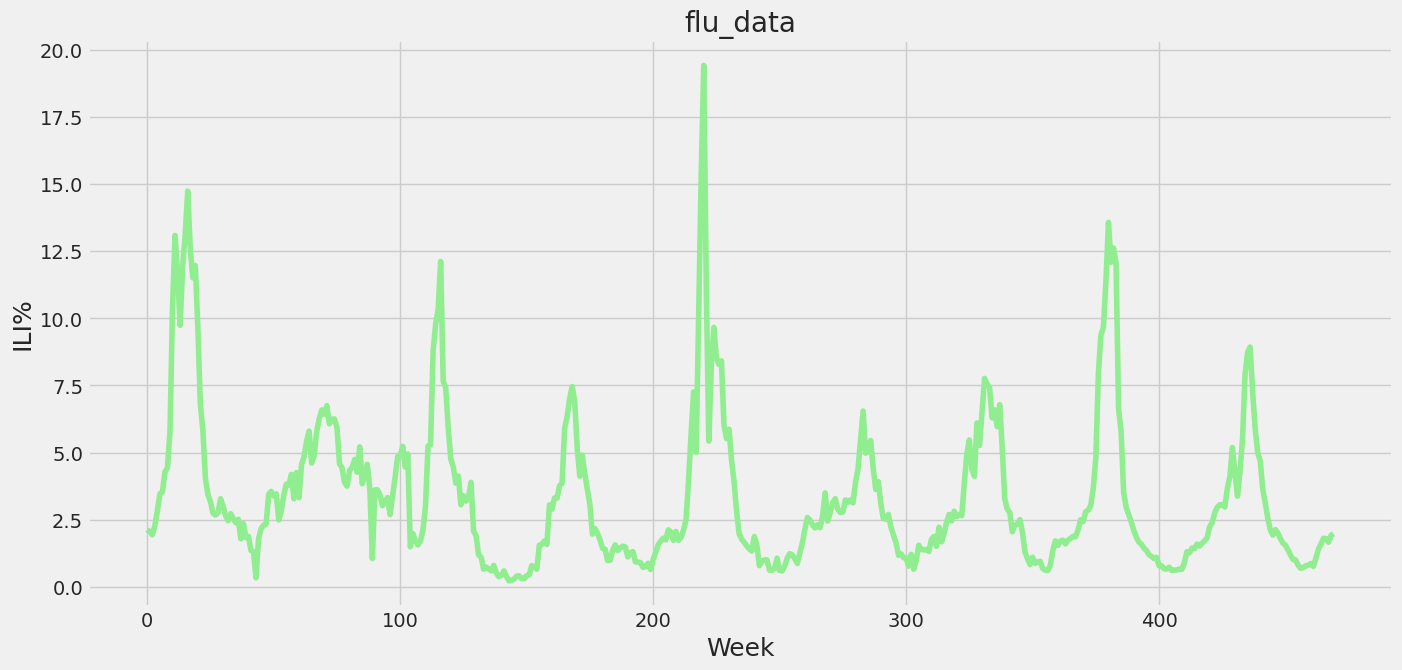

In [4]:
#在kaggle平台的Jupyter Notebook上完成编程和模型训练
#当前模型仅使用单变量ILI%，进行训练和预测
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
path='/kaggle/input/flu-al/data_flu.csv'
df = pd.read_csv(path, header=None)
print(len(df))
# Show data
#图像绘制
plt.figure(figsize=(15,7))
plt.title('flu_data')
plt.plot(df,color="lightgreen")
plt.xlabel('Week', fontsize=18)
plt.ylabel('ILI%', fontsize=18)
plt.show()

In [5]:
dataset = np.array(df) #np.array()：将 Pandas Series 转换为 NumPy 数组，这样更方便进行后续的数值处理。
#划分数据集
training_data_len = int(np.ceil( len(dataset) * 0.8))
print(training_data_len)

376


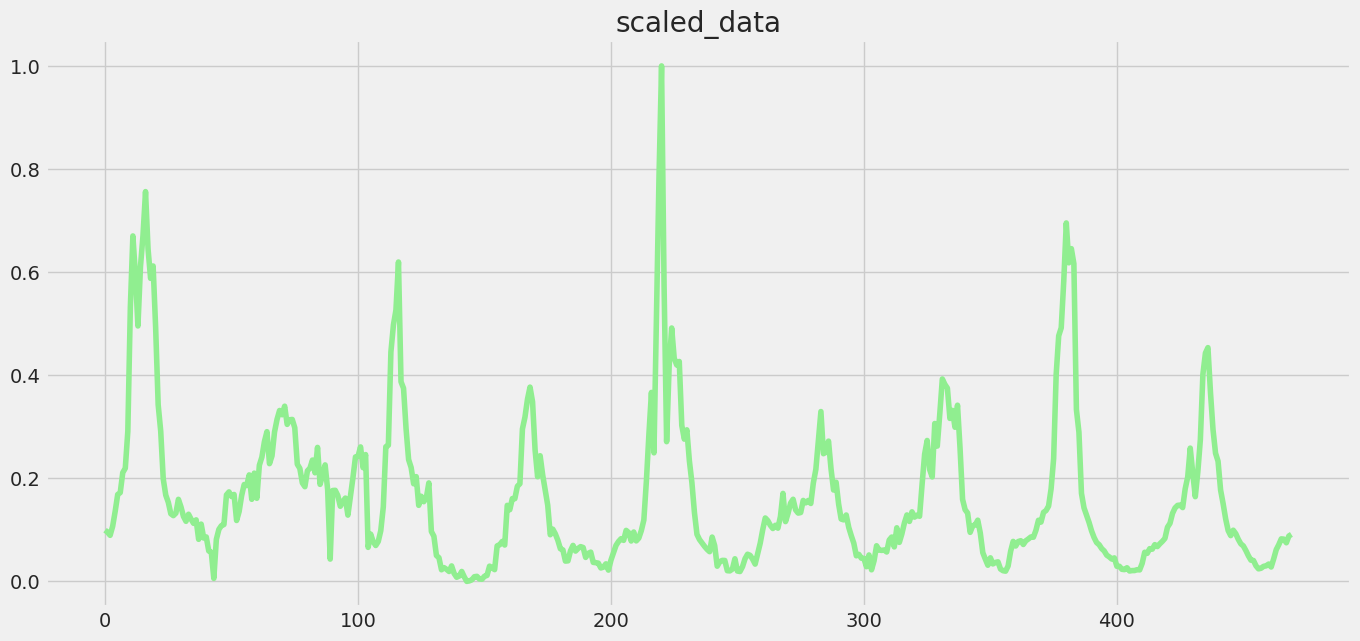

In [6]:
# 将调整数据形状，并将数据归一化
reshape_dataset=dataset.reshape(len(dataset),1)#将一维数组dataset，转化为len(dataset)行1列的二维数组。作用：将数据 dataset 重新调整为 2D 数组，以符合 MinMaxScaler 和神经网络模型的输入格式
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(reshape_dataset)#数据缩放到 [0, 1] 范围内

plt.figure(figsize=(15,7))
plt.title('scaled_data')
plt.plot(scaled_data,color="lightgreen")
# plt.xlabel('Week', fontsize=18)
# plt.ylabel('ILI%', fontsize=18)
plt.show()

In [7]:
#创建训练集
train_data = scaled_data[0:int(training_data_len), :]
print(len(train_data))
x_train = [] #包含滑动窗口沿着train_data滑动时，每次滑动所覆盖的30 个时间步的数据。
y_train = [] #包含对应的目标值，即第 31 个时间步的数据。
 
for i in range(30, len(train_data)):
    x_train.append(train_data[i - 30:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 31:#展示格式
        print(">>>>>>")
        print(x_train)
        print(y_train)
        print("!!!!")
print(len(x_train))


376
>>>>>>
[array([0.09931989, 0.09542281, 0.08928641, 0.10670598, 0.13574435,
       0.16849947, 0.17215994, 0.2109363 , 0.21947672, 0.29090084,
       0.53192378, 0.67012451, 0.59567465, 0.49553006, 0.61051668,
       0.67108861, 0.75610195, 0.64461999, 0.58778462, 0.61185079,
       0.49211192, 0.3425488 , 0.29166952, 0.19892458, 0.16725395,
       0.15346462, 0.13120419, 0.1275213 , 0.13235434, 0.15916431])]
[0.1446474771291832]
!!!!
>>>>>>
[array([0.09931989, 0.09542281, 0.08928641, 0.10670598, 0.13574435,
       0.16849947, 0.17215994, 0.2109363 , 0.21947672, 0.29090084,
       0.53192378, 0.67012451, 0.59567465, 0.49553006, 0.61051668,
       0.67108861, 0.75610195, 0.64461999, 0.58778462, 0.61185079,
       0.49211192, 0.3425488 , 0.29166952, 0.19892458, 0.16725395,
       0.15346462, 0.13120419, 0.1275213 , 0.13235434, 0.15916431]), array([0.09542281, 0.08928641, 0.10670598, 0.13574435, 0.16849947,
       0.17215994, 0.2109363 , 0.21947672, 0.29090084, 0.53192378,
       0.670

In [8]:
# 把数据转换为numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#print(x_train)
print(x_train.shape[0])#行数
print(x_train.shape[1])#列数
print(x_train[:3])#前3行
 
# reshape数组格式为了适配构建的LSTM要去格式
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

346
30
[[0.09931989 0.09542281 0.08928641 0.10670598 0.13574435 0.16849947
  0.17215994 0.2109363  0.21947672 0.29090084 0.53192378 0.67012451
  0.59567465 0.49553006 0.61051668 0.67108861 0.75610195 0.64461999
  0.58778462 0.61185079 0.49211192 0.3425488  0.29166952 0.19892458
  0.16725395 0.15346462 0.13120419 0.1275213  0.13235434 0.15916431]
 [0.09542281 0.08928641 0.10670598 0.13574435 0.16849947 0.17215994
  0.2109363  0.21947672 0.29090084 0.53192378 0.67012451 0.59567465
  0.49553006 0.61051668 0.67108861 0.75610195 0.64461999 0.58778462
  0.61185079 0.49211192 0.3425488  0.29166952 0.19892458 0.16725395
  0.15346462 0.13120419 0.1275213  0.13235434 0.15916431 0.14464748]
 [0.08928641 0.10670598 0.13574435 0.16849947 0.17215994 0.2109363
  0.21947672 0.29090084 0.53192378 0.67012451 0.59567465 0.49553006
  0.61051668 0.67108861 0.75610195 0.64461999 0.58778462 0.61185079
  0.49211192 0.3425488  0.29166952 0.19892458 0.16725395 0.15346462
  0.13120419 0.1275213  0.13235434 0.159

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0085
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
该测试集的RMSE为1.7918568983293566


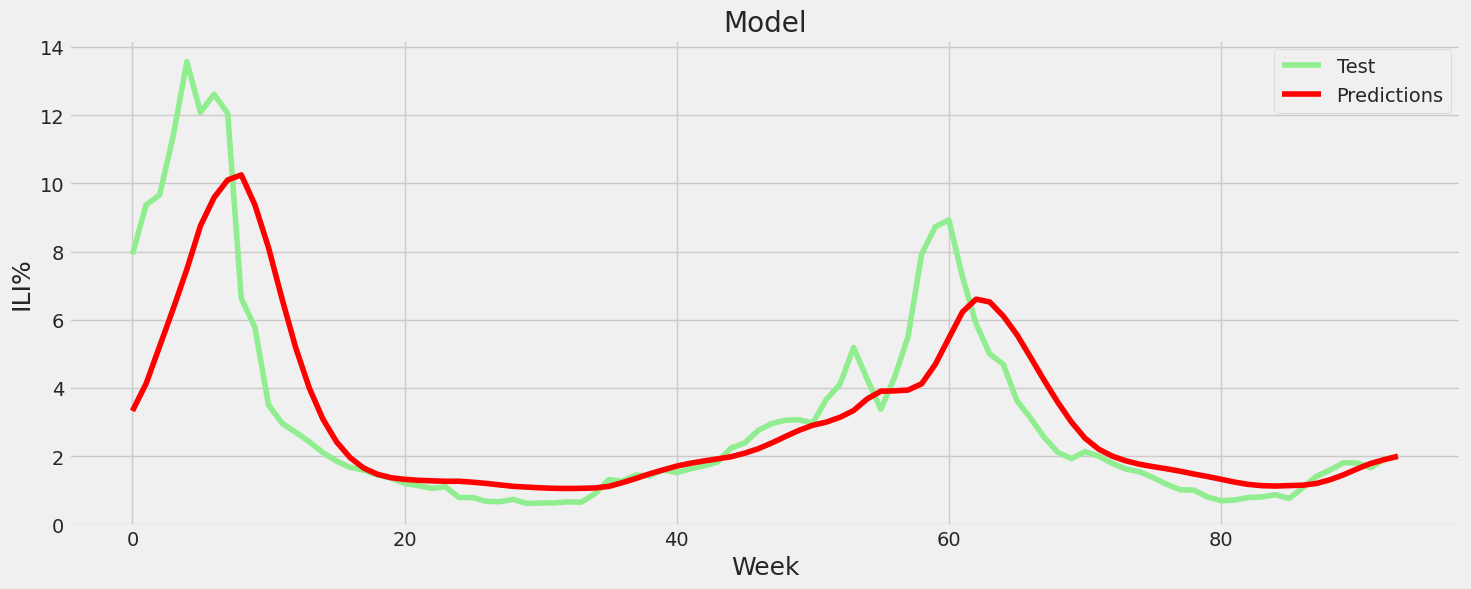

In [9]:
# 建立LSTM模型
model = Sequential()
model.add(LSTM(58, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(34, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
 
# 编制模型
model.compile(optimizer='adam', loss='mean_squared_error')
 
# 训练模型
model.fit(x_train, y_train, batch_size=1, epochs=1)
#创建测试集
#预测第training_data_len要该点前三十（向后看的步长）个的数据
test_data = scaled_data[training_data_len-30:, :]
x_test = []
y_test = reshape_dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i - 30:i, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# 使用构建的模型预测测试集
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
 
# RMSE评价模型
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("该测试集的RMSE为{}".format(rmse))
# 预测数据可视化
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Week', fontsize=18)
plt.ylabel('ILI%', fontsize=18)
plt.plot(y_test,color="lightgreen")
plt.plot(predictions,color='red')
plt.legend([ 'Test', 'Predictions'], loc='upper right')#loc(图例在图像的那个位置）
plt.show()